In [2]:
import pandas as pd
import numpy as np
# from google.colab import files

In [3]:
#defining bias and input values
n_bits = int(8)
n_bits_input = n_bits
num_inputs = 4           
is_signed = 1           #1= signed || 0= unsigned
is_sigmoid_signed = 1   #1= signed || 0= unsigned
weights_on_memory = 1   #1: on memory || 0: weights = inputs

m_bin = 0 # 'm' binary digits are the integer part
n_bin = n_bits - m_bin    # 'n' binary digits are the fractional part of `x`;
n_bin_sigmoid = n_bin #+ 3 #número de casas decimais sigmoide memória

download_files = 0      #1= para baixar || 0= não baixar

In [4]:
# atenuacao_rescale = 0.95
atenuacao_rescale = 1

In [6]:
# pd.set_option('max_rows', 20)
# pd.set_option('max_colwidth', 20)
# pd.describe_option('max_colwidth')

# Definitions

## ROM Definitions


In [7]:
rom_clk = 0   #1= rom com clock || 0= sem clock

# nome_rom = "rom_fx_addwidth"+str(memory_depth)+"_addbit"+str(int(math.log2(memory_depth)))+"_datawidth"+str(memory_width)
nome_rom = "ROM_fixedpoint_8bit"

## Other Definitions

In [8]:
# # https://stackoverflow.com/questions/51843297/convert-real-numbers-to-binary-and-vice-versa-in-python
# # float_to_binary(x, m_bin, n_bin)
# # float_to_binary(x, m_bin, n_bin_sigmoid)
# n_bin = 3 # 'n' binary digits are the fractional part of `x`;
# m_bin = n_bits - n_bin # `m` binary digits are the integer part
# # m_bin = 5 # `m` binary digits are the integer part
# # n_bin = n_bits - m_bin # 'n' binary digits are the fractional part of `x`;
# n_bin_sigmoid = n_bin *2 

In [9]:
# https://stackoverflow.com/questions/51843297/convert-real-numbers-to-binary-and-vice-versa-in-python
# float_to_binary(x, m_bin, n_bin)
# float_to_binary(x, m_bin, n_bin_sigmoid)
# m_bin = 0 # `m` binary digits are the integer part
# n_bin = n_bits - m_bin    # 'n' binary digits are the fractional part of `x`;
# n_bin_sigmoid = n_bin #+ 3 #número de casas decimais sigmoide memória

# m_bin = 5 # `m` binary digits are the integer part
# n_bin = n_bits - m_bin # 'n' binary digits are the fractional part of `x`;
# n_bin_sigmoid = n_bin *2 
# n_bin_sigmoid = 11

In [10]:
n_bin

8

In [11]:
#general parameters
# bias = ((2**m_bin)/2) -4             #117(8b) 
bias = 0
w_value = 0.125
n_inputs_wich_increase = num_inputs            #nro de inputs que crescem seu valor
# n_inputs_wich_increase = 1            #nro de inputs que crescem seu valor


sigmoid_range = 2                    #tamanho eixo x, sigmoide antes tratamento
range_tb_df = (2**m_bin)              #tamanho do dataframe do tb

# mult_factor = 2                       # expande sigmoide
# mult_factor =(2**m_bin)/sigmoid_range # expande sigmoide
mult_factor = 1


if (is_signed ==1):
  unsigned_offset = 0
  offset_df_memory = 0
  # norm_y = (2**(m_bin-1))                   # normalização em y: 256(8bits)
  norm_y = 1
  dx_sigmoid_final = 1/(2**(n_bin_sigmoid-1))     #dx da sigmoid na memória -> depende das casas .fixo com adicional para resolução de dx_input
  
else:
  unsigned_offset = int((2**m_bin)/2)  # 128
  offset_df_memory = unsigned_offset - ((sigmoid_range/2)*mult_factor)
  norm_y = (2**(m_bin))                   # normalização em y: 256(8bits)
  dx_sigmoid_final = 1/(2**(n_bin_sigmoid))     #dx da sigmoid na memória -> depende das casas .fixo com adicional para resolução de dx_input

# dx_sigmoid = 1/(2**n_bin_sigmoid)     #dx da sigmoid na memória -> depende das casas .fixo com adicional para resolução de dx_input

dx_sigmoid = dx_sigmoid_final/mult_factor   #dx necessário antes da expansão

dx_input = 1/(2**n_bin)               #dx das entradas do tb -> depende das casas .fixo

memory_address_type = 1               # 0= int(n) ; 1= float(address)|| indice da memoria int ou float
mem_zeros = 0                         # 1= memória com endereços para valor zero || 0=memória apenas com valores

In [12]:
(2**(m_bin-1))     

0.5

In [13]:
m_bin

0

In [14]:
# (2**m_bin)

In [15]:
# n_bin = 2-> passo input = 2^2=4 -> passo = 1/4 = 0.25 || 0.25^2 = 0.0625 = 0.0001 = 0.00 |

In [16]:
# np.linspace(-(sigmoid_range/2),(sigmoid_range/2),int(total_dx))

In [17]:
# np.linspace(-(7),(7),int(total_dx))

In [18]:
#DX SIGMOID
if (dx_sigmoid == 1):
  total_dx = range_tb_df+1
else:
  
  total_dx = (1/dx_sigmoid)*sigmoid_range +1

# total_dx = range_tb_df+1
# total_dx

In [19]:
#DX INPUTS TB-> define numero total de linhas dataframe inputs_tb
if (dx_input == 1):
  total_dx_input = range_tb_df+1

else:
  total_dx_input = (1/dx_input)*range_tb_df +1

# total_dx = range_tb_df+1
# total_dx_input

In [20]:
# np.linspace(0,range_tb_df,int(total_dx_input))

In [21]:
# 2**n_bits/2

In [22]:
# sigmoid_dx_list = np.linspace(-7,7,15) #vai de -128 a 127, dividido em 256 pontos (8 bits)

# Functions Calculus

In [23]:
import math
exp = math.exp

In [24]:
exp(2)

7.38905609893065

In [25]:
# x1= 1
# x2= 2
# x3= 3
# w1= 4
# w2= 5
# w3= -6
# sum = (x1*w1) + (x2*w2) + (x3*w3) + bias
# sum

In [26]:
# sum= -12

In [27]:
# tanh = 1-(exp(-2*sum))/(1+(exp(-2*sum)))
# tanh

In [28]:
def sigmoid (x):
  return (1/(1+(exp(-1*x))))
sigmoid(2)

0.8807970779778823

In [29]:
function = sigmoid

## Bin | float >> functions

In [30]:
!pip install bitstring
from bitstring import BitArray

def int2bin(a,lenght):
  b= BitArray(int=a, lenght= lenght)
  return b.bin

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python\python.exe -m pip install --upgrade pip' command.


In [31]:
#INT -> BINARY conversion (with 2 complement)
def int_to_bin(n, bits):
    s = bin(n & int("1"*bits, 2))[2:]
    return ("{0:0>%s}" % (bits)).format(s)

In [32]:
# def float_to_binary(x, m, n):
#     """Convert the float value `x` to a binary string of length `m + n`
#     where the first `m` binary digits are the integer part and the last
#     'n' binary digits are the fractional part of `x`.
#     """
#     x_scaled = round(x * 2 ** n)
#     return '{:0{}b}'.format(x_scaled, m + n)

# def binary_to_float(bstr, m, n):
#     """Convert a binary string in the format given above to its float
#     value.
#     """
#     return int(bstr, 2) / 2 ** n

# # print(float_to_binary(10.625, 6, 5))
# print(binary_to_float('00101010100', 6, 5))

In [33]:
#Function used to replace zeros by ones and vice versa
def transform(x):
    text = ''
    for i in x:
        if i == '1':
            text += "0"  # directly add the `.`
        else:
            text += "1"  # directly add the `_`
    return text

transform('01111100') # call the function

'10000011'

In [34]:
ones = str(np.ones(m_bin+n_bin_sigmoid-1))
ones= ones.replace(".", "");
ones= ones.replace("[", "");
ones= ones.replace("]", "");
ones= ones.replace(" ", "");
ones

'1111111'

In [35]:
def float_to_binary(x, m, n, signed):
    """Convert the float value `x` to a binary string of length `m + n`
    where the first `m` binary digits are the integer part and the last
    'n' binary digits are the fractional part of `x`.
    """
    x_replace = ''
    x_inv = ''
    x_inv_float = ''
    x_comp = ''
    decimais = 0

    if (signed == 1):
      decimais = n-1
    else: decimais = n

    x_scaled = round(x * 2 ** (decimais))
    out = '{:0{}b}'.format(x_scaled, m + (decimais)) # float -> bin
    # return out

    #---------------------NUMEROS NEGATIVOS---------------------#
    #Two complement logic
    if (str(out).find('-')== 0): #esta função é True quando == 0
      x_replace = str(out).replace('-','') #tira o sinal negativo que fica no valor
      
      while (len(x_replace)< n ):
        x_replace = '0' + x_replace # adiciona um zeros que a função bosta tira de bug
        #pois a função está deixando com apenas 7 bits quando o valor é negativo ou até menos

      x_inv = transform(x_replace) #replace ones by zeros and vice versa
      x_inv_float = binary_to_float(x_inv, m, (decimais),0) #transforma em real

      #adiciona o 1 binário do complemento de 2, depende do número de bits para fazer esta adição em float
      # onde: (1 de 3 casas decimais) = 0.125 = 2^-3
      #adição feita em real, pois não há operações binárias de soma no python até então, logo:
      #transforma em binário o número inverso já somado com 1
      x_comp = float_to_binary(x_inv_float + (2**-(decimais)), m, n,1)
      # x_comp = x_comp[1:]

      return x_comp
      # return x_scaled,out,x_replace,x_inv,x_inv_float,x_comp,x_comp


      # if (x_scaled < (2**decimais)):
      #   return x_comp
      # else:
      #   return '{:0{}b}'.format(( 2**decimais -1), m + (decimais)) # float -> bin

    #---------------------NUMEROS POSITIVOS---------------------#
    else:
      # out = '0' + out # adiciona um zeros que a função bosta tira de bug
      while (len(out)< n ):
          out = '0' + out # adiciona um zeros que a função bosta tira de bug
      return  out

      # if (x_scaled < (2**decimais)): # se x_scaled < limite: retorna valor normal
      #   while (len(out)< n ):
      #     out = '0' + out # adiciona um zeros que a função bosta tira de bug
      #   return  out
      # else: 
      #   return '{:0{}b}'.format(( 2**decimais -1), m + (decimais)) # float -> bin
    
  # else: #unsigned
  #   x_scaled = round(x * 2 ** n)
  #   return '{:0{}b}'.format(x_scaled, m + n)


def binary_to_float(bstr, m, n, signed): # (binario, exponent, mantissa, signed)
    """Convert a binary string in the format given above to its float
    value.
    """
    if (signed == 1): #signed
      if (bstr[:1]== '1'):
        x_replace = bstr[1:]
        # x_replace = bstr
        return (int((x_replace), 2) / 2 ** (n-1)) -1
      else: return int((bstr), 2) / 2 ** (n-1)

    else: #unsigned
      return int((bstr), 2) / 2 ** n

# print(float_to_binary(10.625, 6, 5))
# print(binary_to_float('00101010100', 6, 5))

In [36]:
x= [-1,-0.992188,-0.507812, -0.500000,-0.492188,-0.015625,0,0.496094,0.507812,0.992188]
for i in range(0,len(x)):
  print('float: ', x[i],'bin: ',float_to_binary(x[i] ,m_bin,n_bin_sigmoid,is_signed))

float:  -1 bin:  10000000
float:  -0.992188 bin:  10000001
float:  -0.507812 bin:  10111111
float:  -0.5 bin:  11000000
float:  -0.492188 bin:  11000001
float:  -0.015625 bin:  11111110
float:  0 bin:  00000000
float:  0.496094 bin:  01000000
float:  0.507812 bin:  01000001
float:  0.992188 bin:  01111111


In [37]:
binary_to_float('100000000', m_bin, n_bin, 0)
# 100000000

1.0

In [38]:
int('1111111',2)

127

In [39]:
int('100000000',2)

256

In [40]:
if ((int('100000000',2)) > int(ones,2)):
  print('é maior')

é maior


In [41]:
# ones_aux

# Começo df_inputs

In [42]:
a = int(((2**n_bits)/2)-7) # 128 - 7 = 121
b = int(((2**n_bits)/2)+7) # 128 + 7 = 135

In [43]:
testes_x1 = range(0,14,1) #start, end, step
testes_x2 = range(0,14,1) #start, end, step
testes_x3 = range(0,14,1) #start, end, step
testes_w1 = range(0,14,1) #start, end, step
testes_w2 = range(0,14,1) #start, end, step
testes_w3 = range(0,14,1) #start, end, step

In [44]:
# testes_x1 = range(a,b,1) #start, end, step
# testes_x2 = (range(((2**n_bits)/2)-7,((2**n_bits)/2)+7,1)) #start, end, step
# testes_x3 = (range(((2**n_bits)/2)-7,((2**n_bits)/2)+7,1)) #start, end, step
# testes_w1 = (range(((2**n_bits)/2)-7,((2**n_bits)/2)+7,1)) #start, end, step
# testes_w2 = (range(((2**n_bits)/2)-7,((2**n_bits)/2)+7,1)) #start, end, step
# testes_w3 = (range(((2**n_bits)/2)-7,((2**n_bits)/2)+7,1)) #start, end, step

In [45]:
# testes_x= []
# testes_w= []
# i=0
# while True:
#     if (i < 2):
#       testes_x.append(range(0,14,1)) #start, end, step
#       testes_w.append(1)  #testes_wi
#       i= i+1
#     elif (i < num_inputs):
#       testes_x.append(1)
#       testes_w.append(1)  #testes_wi
#       i= i+1
#     else:
#       i=0
#       break

In [46]:
# testes_x[2]

In [47]:
input_increment = dx_sigmoid

In [48]:
range(int(-range_tb_df/2),int(range_tb_df/2),1)

range(0, 0)

In [49]:
dataframe_range = np.linspace((-range_tb_df/2),(range_tb_df/2),int(total_dx_input))
# dataframe_range

In [50]:
df_inputs = pd.DataFrame()
i=0
#Xi
while True:
  if (i < n_inputs_wich_increase):
    df_inputs["testes_x"+str(i+1)] = dataframe_range
    i= i+1
  elif (i < num_inputs):
    df_inputs["testes_x"+str(i+1)] = 1
    i= i+1
  else:
    i= 0
    break

In [51]:
range(0, num_inputs)

range(0, 4)

In [52]:
weights_on_memory

1

In [53]:
#PESOS W_i

while True:
  if (i < n_inputs_wich_increase):
    df_inputs["testes_w"+str(i+1)] = w_value  #testes_w1    
    i= i+1
  elif (i < num_inputs):
    df_inputs["testes_w"+str(i+1)] = 1  #testes_w1
    i= i+1
  else:
    df_inputs['bias'] = bias  #testes_w3
    i= 0
    break

In [54]:
df_inputs

,testes_x1,testes_x2,testes_x3,testes_x4,testes_w1,testes_w2,testes_w3,testes_w4,bias
0,-0.500000,-0.500000,-0.500000,-0.500000,0.125,0.125,0.125,0.125,0
1,-0.496094,-0.496094,-0.496094,-0.496094,0.125,0.125,0.125,0.125,0
2,-0.492188,-0.492188,-0.492188,-0.492188,0.125,0.125,0.125,0.125,0
3,-0.488281,-0.488281,-0.488281,-0.488281,0.125,0.125,0.125,0.125,0
4,-0.484375,-0.484375,-0.484375,-0.484375,0.125,0.125,0.125,0.125,0
...,...,...,...,...,...,...,...,...,...
252,0.484375,0.484375,0.484375,0.484375,0.125,0.125,0.125,0.125,0
253,0.488281,0.488281,0.488281,0.488281,0.125,0.125,0.125,0.125,0
254,0.492188,0.492188,0.492188,0.492188,0.125,0.125,0.125,0.125,0
255,0.496094,0.496094,0.496094,0.496094,0.125,0.125,0.125,0.125,0


In [55]:
df_weights = pd.DataFrame()
df_weights = df_inputs.iloc[:, 4:]
if (weights_on_memory == 1): #pesos na memória
  df_inputs.drop(df_inputs.iloc[:, 4:], axis=1, inplace=True)
# df_inputs
# df_weights

In [56]:
df_weights

,testes_w1,testes_w2,testes_w3,testes_w4,bias
0,0.125,0.125,0.125,0.125,0
1,0.125,0.125,0.125,0.125,0
2,0.125,0.125,0.125,0.125,0
3,0.125,0.125,0.125,0.125,0
4,0.125,0.125,0.125,0.125,0
...,...,...,...,...,...
252,0.125,0.125,0.125,0.125,0
253,0.125,0.125,0.125,0.125,0
254,0.125,0.125,0.125,0.125,0
255,0.125,0.125,0.125,0.125,0


In [57]:
num_inputs

4

In [58]:
df_inputs.head()

,testes_x1,testes_x2,testes_x3,testes_x4
0,-0.500000,-0.500000,-0.500000,-0.500000
1,-0.496094,-0.496094,-0.496094,-0.496094
2,-0.492188,-0.492188,-0.492188,-0.492188
3,-0.488281,-0.488281,-0.488281,-0.488281
4,-0.484375,-0.484375,-0.484375,-0.484375


In [59]:
#SUM
df_inputs["sum"] = 0
while True:
  if (weights_on_memory == 1): #pesos na memória
    if (i < num_inputs):
      df_inputs["sum"] = df_inputs["sum"] + (df_inputs["testes_x"+str(i+1)] * df_weights["testes_w"+str(i+1)]) #  
      i= i+1
    else:
      df_inputs["sum"] = df_inputs["sum"] + df_weights["bias"]
      i= 0
      break

  else: #pesos na entrada
    if (i < num_inputs):
      df_inputs["sum"] = df_inputs["sum"] + (df_inputs["testes_x"+str(i+1)] * df_inputs["testes_w"+str(i+1)]) #  
      i= i+1
    else:
      df_inputs["sum"] = df_inputs["sum"] + df_inputs["bias"]
      i= 0
      break

# Sigmoid

## df_sigmoid dx_sigmoid

In [60]:
range_tb_df

1

In [61]:
# # sigmoid_dx_list = np.linspace(-7,7,256) #vai de -7 a 7, dividido em 256 pontos (8 bits)
# # sigmoid_dx_list= range(a,b+1,1)
# sigmoid_dx_list = np.linspace(-(7),7,15) #vai de -128 a 127, dividido em 256 pontos (8 bits)
# sigmoid_dx_list

In [62]:
# # range_tb_df
# sigmoid_dx_list = np.linspace(-7,7,range_tb_df+1) #vai de -128 a 127, dividido em 256 pontos (8 bits)
# sigmoid_dx_list

In [63]:
sigmoid_range

2

In [64]:
# range_tb_df
sigmoid_dx_list = np.linspace(-(sigmoid_range/2),(sigmoid_range/2),int(total_dx)) #vai de -128 a 127, dividido em 256 pontos (8 bits)
# sigmoid_dx_list

In [65]:
# df_sigmoid = pd.DataFrame((range(-int(range_tb_df/2),int(range_tb_df/2)+1,1))) #start, end, step
df_sigmoid = pd.DataFrame(np.linspace(-(sigmoid_range/2),(sigmoid_range/2),int(total_dx))) #start, end, step
df_sigmoid.columns = ['n'] # INPUTS_df
# df_sigmoid['dx'] = sigmoid_dx_list
df_sigmoid = df_sigmoid*atenuacao_rescale
df_sigmoid.head()

,n
0,-1.000000
1,-0.992188
2,-0.984375
3,-0.976562
4,-0.968750


In [66]:
# df_sigmoid

In [67]:
# sigmoid_dx_list

In [68]:
# ((1/(1+(exp(-1*(testes_x1))))).astype(float)).tolist()
# df[0].apply(lambda x: float(x))
sigmoide_rescale = (8/(sigmoid_range/2))*0.8
multiplied_list = [(1/(1+(exp(-1*(element*sigmoide_rescale))))) for element in sigmoid_dx_list]
# multiplied_list
df_sigmoid['sigmoid']= multiplied_list
df_sigmoid.head()
# df_sigmoid

,n,sigmoid
0,-1.000000,0.001659
1,-0.992188,0.001744
2,-0.984375,0.001833
3,-0.976562,0.001927
4,-0.968750,0.002025


In [69]:
# df_sigmoid['n'] = (df_sigmoid['n'] + (unsigned_offset)).astype(int)
# df_sigmoid['n'] = (df_sigmoid['n'] + (unsigned_offset))

In [70]:
# df_sigmoid['n']*3.5

In [71]:
unsigned_offset

0

## Sigmoid expansion (change 'x' rescale)

In [72]:
# n_re_scale = (df_sigmoid['n'])*mult_factor
n_re_scale = (df_sigmoid['n'])*mult_factor
n_re_scale

0     -1.000000
1     -0.992188
2     -0.984375
3     -0.976562
4     -0.968750
         ...   
252    0.968750
253    0.976562
254    0.984375
255    0.992188
256    1.000000
Name: n, Length: 257, dtype: float64

In [73]:
# df_sigmoid['n'] = (df_sigmoid['n'] + (unsigned_offset/2))*mult_factor
df_sigmoid['n'] = n_re_scale

df_sigmoid['n_zeros'] = (df_sigmoid['n'] + dx_sigmoid) #zeros para serem salvos na memória

In [74]:
2*dx_sigmoid

0.015625

In [75]:
df_sigmoid

,n,sigmoid,n_zeros
0,-1.000000,0.001659,-0.992188
1,-0.992188,0.001744,-0.984375
2,-0.984375,0.001833,-0.976562
3,-0.976562,0.001927,-0.968750
4,-0.968750,0.002025,-0.960938
...,...,...,...
252,0.968750,0.997975,0.976562
253,0.976562,0.998073,0.984375
254,0.984375,0.998167,0.992188
255,0.992188,0.998256,1.000000


In [76]:
# df_sigmoid[121:136]

In [78]:
import matplotlib.pyplot as plt
plt.close("all")

<AxesSubplot: >

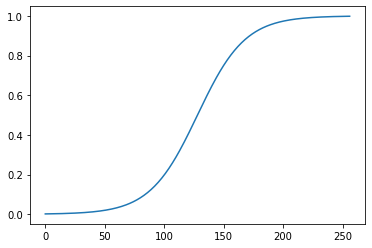

In [79]:
# (pd.Series(sigmoid_dx)).plot()
(pd.Series(multiplied_list)).plot()

In [80]:
# (pd.Series(multiplied_list[121:136])).plot()

In [81]:
norm_y

1

In [82]:
#CONTAS Y(SAÍDA)
# df_sigmoid['sigmoid_dx']*df_sigmoid['n']
# df_sigmoid['sig_int'] = df_sigmoid['sigmoid'].astype(int)
df_sigmoid['sig_norm']= df_sigmoid['sigmoid']*norm_y
# df_sigmoid['sig_norm_int'] = df_sigmoid['sig_norm'].astype(int)#8b ->MEMORY

# df_sigmoid['y']= (df_sigmoid['sigmoid']) # y = sigmoid_dx * n

# df_sigmoid['y_norm_int']= (df_sigmoid['sig_norm_int']).astype(int)#16b
# df_sigmoid['y_div']= (df_sigmoid['y_norm_int']/norm_y)
# df_sigmoid['y_int'] = df_sigmoid['y_div'].astype(int)
df_sigmoid

,n,sigmoid,n_zeros,sig_norm
0,-1.000000,0.001659,-0.992188,0.001659
1,-0.992188,0.001744,-0.984375,0.001744
2,-0.984375,0.001833,-0.976562,0.001833
3,-0.976562,0.001927,-0.968750,0.001927
4,-0.968750,0.002025,-0.960938,0.002025
...,...,...,...,...
252,0.968750,0.997975,0.976562,0.997975
253,0.976562,0.998073,0.984375,0.998073
254,0.984375,0.998167,0.992188,0.998167
255,0.992188,0.998256,1.000000,0.998256


In [83]:
# float_to_binary('0.010', m_bin, n_bin_sigmoid)

In [84]:
# #CONTAS Y(SAÍDA)
# # df_sigmoid['sigmoid_dx']*df_sigmoid['n']

# df_sigmoid['y']= (df_sigmoid['sigmoid']*df_sigmoid['n']) # y = sigmoid_dx * n

# df_sigmoid['sig_int'] = df_sigmoid['sigmoid'].astype(int)
# df_sigmoid['sig_norm']= df_sigmoid['sigmoid']*256
# df_sigmoid['sig_norm_int'] = df_sigmoid['sig_norm'].astype(int)#8b ->MEMORY

# df_sigmoid['y_norm_int']= (df_sigmoid['sig_norm_int']*df_sigmoid['n'])#16b
# df_sigmoid['y_div']= (df_sigmoid['y_norm_int']/256)
# df_sigmoid['y_int'] = df_sigmoid['y_div'].astype(int)
# df_sigmoid

In [85]:
# plt.plot( 'n', 'sig_int', data=df_sigmoid)
# (pd.Series(multiplied_list)).plot()

## df_sigmoid_bin

In [86]:
# # float_to_binary(x, m, n)
# m_bin = 6 # `m` binary digits are the integer part
# n_bin = 2 # 'n' binary digits are the fractional part of `x`;

	dtype		=	fxp-s8/8
	Value		=	-0.5
	underflow	=	True
	inaccuracy	=	True

	Signed		=	True
	Word bits	=	8
	Fract bits	=	8
	Int bits	=	-1
	Val data type	=	<class 'float'>

	Upper		=	0.49609375
	Lower		=	-0.5
	Precision	=	0.00390625
	Overflow	=	saturate
	Rounding	=	trunc
	Shifting	=	expand



In [89]:
# pd.set_option('max_rows', 9999)
# pd.set_option('max_colwidth', 20)
# pd.describe_option('max_colwidth')

#SIGMOID MEMORY
df_sigmoid_bin = pd.DataFrame()

#verification
df_sigmoid_bin['address'] = (df_sigmoid['n'])
df_sigmoid_bin['sigmoid'] = (df_sigmoid['sig_norm'])

#AQUI QUE O 'PONTO FIXO' DEVE COMEÇAR
# https://www.google.com/search?q=python+real+number+to+binary&oq=python+real+number+to+bin&aqs=chrome.1.69i57j0i22i30.8856j1j1&sourceid=chrome&ie=UTF-8
# https://stackoverflow.com/questions/51843297/convert-real-numbers-to-binary-and-vice-versa-in-python
# https://pythonhosted.org/bitstring/
df_sigmoid_bin['address_bin'] = (df_sigmoid['n'].apply(lambda x: float_to_binary(x ,m_bin,n_bin_sigmoid,is_signed)))
df_sigmoid_bin['address_zeros'] = (df_sigmoid['n_zeros'].apply(lambda x: float_to_binary(x ,m_bin,n_bin_sigmoid,is_signed)))

# df_sigmoid_bin['n_bin'] = (df_sigmoid['n'].apply(lambda x: float_to_binary(x ,m_bin,n_bin_sigmoid)))

df_sigmoid_bin['sigmoid_bin'] = (df_sigmoid['sig_norm'].apply(lambda x: float_to_binary(x ,m_bin,n_bin_sigmoid,is_sigmoid_signed)))
# df_sigmoid_bin.head()
df_sigmoid_bin
#!!coluna address_zeros está repetindo endereços do address_bin!!

,address,sigmoid,address_bin,address_zeros,sigmoid_bin
0,-1.000000,0.001659,10000000,10000001,00000000
1,-0.992188,0.001744,10000001,10000010,00000000
2,-0.984375,0.001833,10000010,10000011,00000000
3,-0.976562,0.001927,10000011,10000100,00000000
4,-0.968750,0.002025,10000100,10000101,00000000
...,...,...,...,...,...
252,0.968750,0.997975,01111100,01111101,10000000
253,0.976562,0.998073,01111101,01111110,10000000
254,0.984375,0.998167,01111110,01111111,10000000
255,0.992188,0.998256,01111111,10000000,10000000


In [131]:
from fxpmath import Fxp

x = Fxp(-0.992188	, signed=True, n_int =0, n_frac=8,frac_dot=True)
# x.info(verbose=3)
print(x.bin())

100000010


In [133]:
from fxpmath import Fxp

def float_to_bin(value: float,signed:bool =False, n_int: int=8, n_frac:int =8):
    x = Fxp(-0.992188	, signed=signed, n_int=n_int, n_frac=n_frac)

    return x.bin()


In [105]:
n_bin_sigmoid

8

In [132]:
x = -0.984375	
float_to_bin(value = x,signed = is_signed, n_word =9, n_frac= 8)

'100000010'

In [115]:
n_bin

8

In [134]:
m_bin

0

In [138]:
n_bin_sigmoid = n_bin

In [139]:
#SIGMOID MEMORY
df_sigmoid_bin = pd.DataFrame()
df_sigmoid_bin['address'] = (df_sigmoid['n'])
df_sigmoid_bin['sigmoid'] = (df_sigmoid['sig_norm'])
df_sigmoid_bin['address_bin'] = (df_sigmoid['n'].apply(lambda x: Fxp(x, signed=is_signed, n_int= m_bin , n_frac= n_bin_sigmoid).bin() ))
# df_sigmoid_bin['address_zeros'] = (df_sigmoid['n_zeros'].apply(lambda x: Fxp(x, signed=is_signed, n_word= n_bin_sigmoid, n_frac= n_bin_sigmoid).bin() ))
df_sigmoid_bin['sigmoid_bin'] = (df_sigmoid['sig_norm'].apply(lambda x: Fxp(x, signed=is_sigmoid_signed, n_int= m_bin, n_frac= n_bin_sigmoid).bin() ))
df_sigmoid_bin
#!!coluna address_zeros está repetindo endereços do address_bin!!

,address,sigmoid,address_bin,sigmoid_bin
0,-1.000000,0.001659,100000000,000000000
1,-0.992188,0.001744,100000010,000000000
2,-0.984375,0.001833,100000100,000000000
3,-0.976562,0.001927,100000110,000000000
4,-0.968750,0.002025,100001000,000000000
...,...,...,...,...
252,0.968750,0.997975,011111000,011111111
253,0.976562,0.998073,011111010,011111111
254,0.984375,0.998167,011111100,011111111
255,0.992188,0.998256,011111110,011111111


In [ ]:
# df_sigmoid

In [111]:
# address_bin_converted = binary_to_float(df_sigmoid_bin['address_bin'], str(m_bin), str(n_bin_sigmoid))
address_bin_converted = df_sigmoid_bin['address_bin'].apply(lambda x: binary_to_float(x ,m_bin,n_bin_sigmoid,is_signed))
# address_bin_converted

<AxesSubplot: >

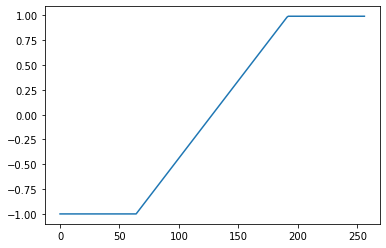

In [112]:
# (pd.Series(sigmoid_dx)).plot()
(pd.Series(address_bin_converted)).plot()

In [113]:
#conferir quantas linhas de endereço duplicadas tem
len(df_sigmoid_bin['address_bin'])-len(df_sigmoid_bin['address_bin'].drop_duplicates())

128

In [114]:
len(df_sigmoid_bin['address_bin'])

257

In [ ]:
duplicated_addr_bin = pd.DataFrame(df_sigmoid_bin['address_bin'].duplicated())

In [ ]:
duplicated_addr_bin.head()

,address_bin
0,False
1,False
2,False
3,False
4,False


In [ ]:
duplicated_addr_bin = duplicated_addr_bin[duplicated_addr_bin['address_bin'] == True]  # df will have only rows with True in c3

In [ ]:
# duplicated_addr_bin.head()

In [ ]:
# df_sigmoid

## Substitui máximos df_Sigmoid

In [ ]:
pd.set_option('max_rows', 9999)
pd.set_option('max_colwidth', 20)
pd.describe_option('max_colwidth')

display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 20]


In [ ]:
zeros_aux = str(np.zeros(m_bin+n_bin_sigmoid-1))
zeros_aux= zeros_aux.replace(".", "");
zeros_aux= zeros_aux.replace("[", "");
zeros_aux= zeros_aux.replace("]", "");
zeros_aux= zeros_aux.replace(" ", "");

ones_aux = str(np.ones(m_bin+n_bin_sigmoid-1))
ones_aux= ones_aux.replace(".", "");
ones_aux= ones_aux.replace("[", "");
ones_aux= ones_aux.replace("]", "");
ones_aux= ones_aux.replace(" ", "");

In [ ]:
##------------CORREÇÃO DE MÁXIMOS e MÍNIMOS BINÁRIOS------------##

#Substituindo erros de conversão float -> bin_2complement
#valores acima de valor x, estavam sendo convertidos com por ex, 100 sendo que
#o máximo seria 011 (apenas exemplo)

#--------------Address--------------# (signed)
df_sigmoid_bin['address_bin'].iloc[int(len(df_sigmoid_bin)/2):].replace(
    to_replace=['1' + zeros_aux],
    value='0' + ones_aux,
inplace=True)

if (is_sigmoid_signed == 0):

  #--------------Sigmoid--------------# (unsigned)
  df_sigmoid_bin['sigmoid_bin'].replace(to_replace=['10' + zeros_aux],
      value= '1' + ones_aux,
  inplace=True)

#============================================================================#
else:

    #--------------Sigmoid--------------# (signed)
  df_sigmoid_bin['sigmoid_bin'].replace(to_replace=['1' + zeros_aux],
      value= '0' + ones_aux,
  inplace=True)

df_sigmoid_bin

,address,sigmoid,address_bin,address_zeros,sigmoid_bin
0,-1.000000,0.001659,10000000,10000001,00000000
1,-0.992188,0.001744,10000001,10000010,00000000
2,-0.984375,0.001833,10000010,10000011,00000000
3,-0.976562,0.001927,10000011,10000100,00000000
4,-0.968750,0.002025,10000100,10000101,00000000
5,-0.960938,0.002129,10000101,10000110,00000000
6,-0.953125,0.002238,10000110,10000111,00000000
7,-0.945312,0.002352,10000111,10001000,00000000
8,-0.937500,0.002473,10001000,10001001,00000000
9,-0.929688,0.002599,10001001,10001010,00000000


In [ ]:
#tirar linhas que contém valores binários com mais bits que o permitido
df_sigmoid_bin.drop(df_sigmoid_bin.tail(1).index,inplace=True) # drop last n rows
# df_sigmoid_bin.drop(df_sigmoid_bin.head(1).index,inplace=True) # drop first n rows    

In [ ]:
# float_to_binary(-15.984375, 5, 6)

In [ ]:
# df_sigmoid_bin.iloc[1024:]

In [ ]:
# df_sigmoid_bin['address_bin'][1023]

In [ ]:
# int(len(df_sigmoid_bin)/2) -1

In [ ]:
# df_sigmoid_bin['address_bin'] = df_sigmoid_bin['address_bin'].str.replace('-','')
# df_sigmoid_bin['address_zeros'] = df_sigmoid_bin['address_zeros'].str.replace('-','')
# # df_sigmoid_bin

In [ ]:
# '1'+ df_sigmoid_bin['address_bin'][2]

In [ ]:
# df_sigmoid_bin['address_bin'][1024]

In [ ]:
# df_sigmoid_bin.duplicated()

In [ ]:
# #SIGMOID MEMORY
# df_sigmoid_bin = pd.DataFrame()

# #verification
# df_sigmoid_bin['address'] = (df_sigmoid['n'][121:136])
# df_sigmoid_bin['sig_norm_int_ver'] = (df_sigmoid['sig_norm_int'][121:136])

# df_sigmoid_bin['address_bin'] = (df_sigmoid['n'][121:136].apply(lambda x: int_to_bin(x ,n_bits)))
# df_sigmoid_bin['sig_norm_int'] = (df_sigmoid['sig_norm_int'][121:136].apply(lambda x: int_to_bin(x ,n_bits)))
# df_sigmoid_bin.head()

In [ ]:
# #SIGMOID MEMORY
# df_sigmoid_bin = pd.DataFrame()

# #verification
# df_sigmoid_bin['address'] = (df_sigmoid['n'])
# df_sigmoid_bin['sig_norm_int_ver'] = (df_sigmoid['sig_norm_int'])

# #AQUI QUE O 'PONTO FIXO' DEVE COMEÇAR
# # https://www.google.com/search?q=python+real+number+to+binary&oq=python+real+number+to+bin&aqs=chrome.1.69i57j0i22i30.8856j1j1&sourceid=chrome&ie=UTF-8
# # https://stackoverflow.com/questions/51843297/convert-real-numbers-to-binary-and-vice-versa-in-python
# # https://pythonhosted.org/bitstring/
# df_sigmoid_bin['address_bin'] = (df_sigmoid['n'].apply(lambda x: int_to_bin(x ,n_bits)))
# df_sigmoid_bin['sig_norm_int'] = (df_sigmoid['sig_norm_int'].apply(lambda x: int_to_bin(x ,n_bits)))
# df_sigmoid_bin

In [ ]:
len(df_sigmoid_bin)

256

# Graphs

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.offline as py

In [ ]:
pacitydef = 0.8
# teste = go.Scatter(
#     # x=dftf.xs('Date', level='Stock info', axis=1)[tickers[k]],
#     x= dftf.index,
#     y=y_test,
#     name="teste",
#     line= dict(color='#0080FF'),
#     opacity = opacitydef,
#     line_shape='spline'
#     )

sigmoid = go.Scatter(
    # x=dftf.xs('Date', level='Stock info', axis=1)[tickers[k]],
    x= df_sigmoid_bin['address'],
    y=df_sigmoid_bin['sigmoid'],
    name="sigmoid",
    line= dict(color='#FF8000'),
    opacity = 0.8,
    line_shape='spline')

dadospred = ([sigmoid])#, pred])
figpred = go.Figure(data=dadospred)#, layout=layout)
py.iplot(figpred)

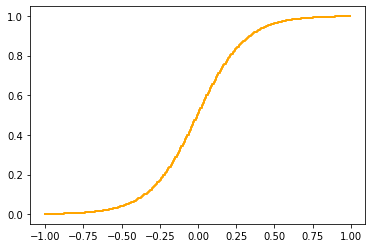

In [ ]:
#https://stackoverflow.com/questions/35067304/pandas-dataframe-step-plot-where-post
# df_sigmoid_bin.plot(drawstyle="steps", linewidth=2, data='sigmoid')
plt.plot('address','sigmoid', drawstyle="steps", linewidth=2, data=df_sigmoid_bin, color ='orange')
# df_sigmoid_bin.plot(drawstyle="steps-post", linewidth=2)

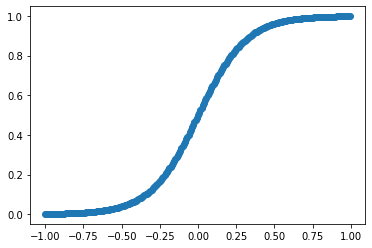

In [ ]:
plt.plot( 'address', 'sigmoid', data=df_sigmoid_bin, linestyle='-', marker='o')

In [ ]:
# df_sigmoid_bin

In [ ]:
# # https://matplotlib.org/3.3.4/api/_as_gen/matplotlib.pyplot.step.html
# # plt.step('address', 'sig_norm_int_ver', where='post', data=df_sigmoid_bin, **kwargs)

# plt.step('address', 'sig_norm_int_ver', where='post', data=df_sigmoid_bin, label='post')
# plt.plot('address', 'sig_norm_int_ver', 'o--', color='grey', alpha=0.3)

# # plt.grid(axis=df_sigmoid_bin['address'], color='0.95')
# plt.legend(title='sigmoid memory')
# # plt.title('plt.step(where=...)')

# RAM/ROM bin -> .mif file (Activation function: sigmoid)

## Definições + gerador de texto

In [ ]:
# https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwjO-qKlubruAhWNCrkGHSCwAmsQFjAAegQIARAC&url=https%3A%2F%2Fwww.mil.ufl.edu%2F4712%2Fdocs%2Fmif_help.pdf&usg=AOvVaw1fJCvah6C5OcARNOlKEIg4

In [ ]:
memory_width= m_bin + n_bin_sigmoid
if (memory_address_type == 0): # 0= int(n)
  memory_depth = len(df_sigmoid_bin)
  memory_value_type = 'DEC' #Enter BIN, DEC, HEX, OCT, or UNS; #because memory is with (signed/unsigned) bin address
else: #1= float(address)
  memory_depth = len(df_sigmoid_bin)
  memory_value_type = 'BIN' #Enter BIN, DEC, HEX, OCT, or UNS; #because memory is with (signed/unsigned) bin address

memory_depth

256

In [ ]:
df_sigmoid_bin_index_binary = df_sigmoid_bin.index

In [ ]:
zeros_memory = str(np.zeros(memory_width))
zeros_memory= zeros_memory.replace(".", "");
zeros_memory= zeros_memory.replace("[", "");
zeros_memory= zeros_memory.replace("]", "");
zeros_memory= zeros_memory.replace(" ", "");
zeros_memory

'00000000'

In [ ]:
# memory_width=8
# memory_depth = 256
# memory_value_type = 'BIN' #Enter BIN, DEC, HEX, OCT, or UNS; #because memory is with (signed/unsigned) bin address

In [ ]:
df_sigmoid_first= float(df_sigmoid['n'].iloc[:1])

In [ ]:
df_sigmoid.drop(df_sigmoid.tail(1).index,inplace=True) # drop last 1 rows

In [ ]:
# df_sigmoid_bin.head()

In [ ]:
# df_sigmoid_bin['address_bin'].head()

In [ ]:
#colocando na memória com o Index
i= 0
text = str('')
text_zeros = str('')
text_rom_to_asic = str('--"bin_address" => "bin_data",- address(sum) || f(x) \n') # -1 a 1
#texto para fazer lógica 'signed' funcionar no std_logic_vector
text_rom_to_asic_2 = str('--"bin_data",-- address(sum) || f(x) \n')# 0 a 1 e -1 a 0

#------------------------------- ROM ASIC -------------------------------#
#texto rom -> vhd (asic) || índice por 'n'
for i in range(int(len(df_sigmoid_bin)/2), len(df_sigmoid_bin)): 
    text_rom_to_asic_2 = (
        text_rom_to_asic_2+'"' 
             +str(df_sigmoid_bin['sigmoid_bin'][i])+  '",-- '
             +'('+df_sigmoid_bin['address_bin'][i]+')'
             + str(offset_df_memory +df_sigmoid_first+(i*dx_sigmoid*mult_factor))
             +' || '+str(df_sigmoid['sig_norm'][i]) +'\n')

for i in range(0, int(len(df_sigmoid_bin)/2) ): 
    text_rom_to_asic_2 = (
        text_rom_to_asic_2+'"' #pega o q já tem de texto
             +str(df_sigmoid_bin['sigmoid_bin'][i])+  '",-- ' #pega elemento i da sigmoide
             +'('+df_sigmoid_bin['address_bin'][i]+')'
             +str(offset_df_memory +df_sigmoid_first+((i)*dx_sigmoid*mult_factor))
             +' || '+str(df_sigmoid['sig_norm'][i]) +'\n')
    

#------------------------------- ROM .mif -------------------------------#
#define se o endereço será com 'n' ou 'address'
if (memory_address_type == 0): # 0= int(n)
  for i in range(0, len(df_sigmoid_bin)): #caso seja por 'n'
    text = (text+''+ str(df_sigmoid_bin.index[i]) + ':' + str(df_sigmoid_bin['sigmoid_bin'][i])+  ';-- '+str(offset_df_memory +df_sigmoid_first+(i*dx_sigmoid*mult_factor))+' || '+str(df_sigmoid['sig_norm'][i]) +'\n')
    # )
else: #1= float(address)
  for i in range(0, len(df_sigmoid_bin)):
    text = (text+''+ str(df_sigmoid_bin['address_bin'][i]) + ':' +str(df_sigmoid_bin['sigmoid_bin'][i])+  ';-- '+str(offset_df_memory +df_sigmoid_first+(i*dx_sigmoid*mult_factor))+' || '+str(df_sigmoid['sig_norm'][i]) +'\n')
   
   #essa não funciona pra compilar 
   # text_rom_to_asic = (text_rom_to_asic+'"'+ str(df_sigmoid_bin['address_bin'][i]) + '" => "' +str(df_sigmoid_bin['sigmoid_bin'][i])+  '";-- '+str(offset_df_memory +df_sigmoid_first+(i*dx_sigmoid*mult_factor))+' || '+str(df_sigmoid['sig_norm'][i]) +'\n')
    # )
    # text_zeros = (text_zeros+''+ str(df_sigmoid_bin['address_zeros'][i]) + ':' +zeros_memory+  ';-- '+str(df_sigmoid['n_zeros'][i])+' || zero \n')

In [ ]:
# text_file = open("text_rom_to_asic_2.txt", "w")
# text_file.write(text_rom_to_asic_2)
# text_file.close()

In [ ]:
# rom_list = text_rom_to_asic.splitlines()
# rom_list = rom_list[0:1] + rom_list[int(len(rom_list)/2)+1:] + rom_list[1:int(len(rom_list)/2)]
# rom_list = '\n'.join(rom_list)

In [ ]:
if (mem_zeros == 0): # 0= memória sem os zeros
  text_zeros = str('')

In [ ]:
# #https://stackoverflow.com/questions/19751148/quartus-initializing-ram
# #https://stackoverflow.com/questions/10660435/pythonic-way-to-create-a-long-multi-line-string
# rom_text_init = ('\n'
# 'DEPTH='+str(memory_depth)+';\n'
# 'WIDTH='+str(memory_width)+';\n'
# 'ADDRESS_RADIX='+(memory_value_type)+';\n' #because memory is with (signed/unsigned) bin address
# 'DATA_RADIX='+(memory_value_type)+';\n' #because data is bin type
# '\n'
# 'CONTENT BEGIN\n'
# '[0.. 01111000] : 00000000;\n' #value = 0
# '[10001000.. 11111111] : 11111111;\n' #value = max(8bits) = 255

# ''+ df_sigmoid_bin['address_bin'][0] + ':'   +df_sigmoid_bin['sig_norm_int'][0]+  ';-- 121\n'
# ''+ df_sigmoid_bin['address_bin'][1] + ':'   +df_sigmoid_bin['sig_norm_int'][1]+  ';-- 122\n'   
# ''+ df_sigmoid_bin['address_bin'][2] + ':'   +df_sigmoid_bin['sig_norm_int'][2]+  ';-- 123\n'
# ''+ df_sigmoid_bin['address_bin'][3] + ':'   +df_sigmoid_bin['sig_norm_int'][3]+  ';-- 124\n'
# ''+ df_sigmoid_bin['address_bin'][4] + ':'   +df_sigmoid_bin['sig_norm_int'][4]+  ';-- 125\n'
# ''+ df_sigmoid_bin['address_bin'][5] + ':'   +df_sigmoid_bin['sig_norm_int'][5]+  ';-- 126\n'
# ''+ df_sigmoid_bin['address_bin'][6] + ':'   +df_sigmoid_bin['sig_norm_int'][6]+  ';-- 127\n'
# ''+ df_sigmoid_bin['address_bin'][7] + ':'   +df_sigmoid_bin['sig_norm_int'][7]+  ';-- 128\n'
# ''+ df_sigmoid_bin['address_bin'][8] + ':'   +df_sigmoid_bin['sig_norm_int'][8]+  ';-- 129\n'
# ''+ df_sigmoid_bin['address_bin'][9] + ':'   +df_sigmoid_bin['sig_norm_int'][9]+  ';-- 130\n'
# ''+ df_sigmoid_bin['address_bin'][10] + ':'  +df_sigmoid_bin['sig_norm_int'][10]+ ';-- 131\n'
# ''+ df_sigmoid_bin['address_bin'][11] + ':'  +df_sigmoid_bin['sig_norm_int'][11]+ ';-- 132\n'
# ''+ df_sigmoid_bin['address_bin'][12] + ':'  +df_sigmoid_bin['sig_norm_int'][12]+ ';-- 133\n'
# ''+ df_sigmoid_bin['address_bin'][13] + ':'  +df_sigmoid_bin['sig_norm_int'][13]+ ';-- 134\n'
# ''+ df_sigmoid_bin['address_bin'][14] + ':'  +df_sigmoid_bin['sig_norm_int'][14]+ ';-- 135\n'

# #[40..7F]  :   0000000000000000;
# 'END;\n'
# '')

In [ ]:
# DEPTH=256;
# WIDTH=8;
# ADDRESS_RADIX=BIN;
# DATA_RADIX=BIN;

# CONTENT BEGIN
# 0:00000000;-- 121.0 
# 1:00000000;-- 121.25 
# 2:00000000;-- 121.5 
# 3:00000000;-- 121.75 
# 4:00000000;-- 122.0 
# 5:00000000;-- 122.25 
# 6:00000100;-- 122.5 
# 7:00000100;-- 122.75 
# 8:00000100;-- 123.0 
# 9:00001000;-- 123.25 
# 10:00001000;-- 123.5 
# 11:00001100;-- 123.75 
# 12:00010000;-- 124.0 
# 13:00010100;-- 124.25 
# 14:00011100;-- 124.5 
# 15:00100100;-- 124.75 
# 16:00110000;-- 125.0 
# 17:00111100;-- 125.25 
# 18:01001100;-- 125.5 
# 19:01100000;-- 125.75 
# 20:01111000;-- 126.0 
# 21:10010100;-- 126.25 
# 22:10111000;-- 126.5 
# 23:11100100;-- 126.75 
# 24:100010000;-- 127.0 
# 25:101001000;-- 127.25 
# 26:110000000;-- 127.5 
# 27:111000000;-- 127.75 
# 28:1000000000;-- 128.0 
# 29:1000111100;-- 128.25 
# 30:1001111100;-- 128.5 
# 31:1010110100;-- 128.75 
# 32:1011101100;-- 129.0 
# 33:1100011000;-- 129.25 
# 34:1101000100;-- 129.5 
# 35:1101101000;-- 129.75 
# 36:1110000100;-- 130.0 
# 37:1110011100;-- 130.25 
# 38:1110110000;-- 130.5 
# 39:1111000000;-- 130.75 
# 40:1111001100;-- 131.0 
# 41:1111011000;-- 131.25 
# 42:1111100000;-- 131.5 
# 43:1111101000;-- 131.75 
# 44:1111101100;-- 132.0 
# 45:1111110000;-- 132.25 
# 46:1111110100;-- 132.5 
# 47:1111110100;-- 132.75 
# 48:1111111000;-- 133.0 
# 49:1111111000;-- 133.25 
# 50:1111111000;-- 133.5 
# 51:1111111100;-- 133.75 
# 52:1111111100;-- 134.0 
# 53:1111111100;-- 134.25 
# 54:1111111100;-- 134.5 
# 55:1111111100;-- 134.75 
# 56:1111111100;-- 135.0 
# END;


In [ ]:
# print(text)

In [ ]:
# #https://stackoverflow.com/questions/10660435/pythonic-way-to-create-a-long-multi-line-string
# rom_text_file = (''
# 'WIDTH='+memory_width+';'
# 'DEPTH='+memory_depth+';'
# 'ADDRESS_RADIX='+memory_value_type+';' #because memory is with (signed/unsigned) bin address
# 'DATA_RADIX='+memory_value_type+';' #because data is bin type
# ''
# 'CONTENT BEGIN'
# '[0.. ('01111001 - 1)] : 00000000; #value = 0
# [(10000111 + 1).. (11111111)] : 11111111; #value = max(8bits) = 255

# 01111001  :   00000000;-- 121
# 01111010  :   00000000;-- 122    
# 01111011  :   00000001;-- 123
# 01111100  :   00000100;-- 124
# 01111101  :   00001100;-- 125
# 01111110  :   00011110;-- 126
# 01111111  :   01000100;-- 127
# 10000000  :   10000000;-- 128
# 10000001  :   10111011;-- 129
# 10000010  :   11100001;-- 130
# 10000011  :   11110011;-- 131
# 10000100  :   11111011;-- 132
# 10000101  :   11111110;-- 133
# 10000110  :   11111111;-- 134
# 10000111  :   11111111;-- 135

# #[40..7F]  :   0000000000000000;
# END;
# """)

In [ ]:
# import binascii
# filename = 'test.dat'
# with open(filename, 'rb') as f:
#     content = f.read()
# print(binascii.hexlify(content))

## .mif file

In [ ]:
#https://stackoverflow.com/questions/19751148/quartus-initializing-ram
#https://stackoverflow.com/questions/10660435/pythonic-way-to-create-a-long-multi-line-string
#https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqbG1UYnpNQjBVempjaUVSa1FTb01hZWZhYS13Z3xBQ3Jtc0ttQ3dlblVRN0tXN2ZtUE9fZlE0TjZKMU1Icjh0Z01GT1Zmc25ucjdYcktEY2pJX0swNU9XdHdQUVBmYnVvZHBidE1uR1FOUkVtSDkxUmdudkQ1TmliV09jR1JNMkgtUTIzQ0dpMk1XTTcweEZUa0Jubw&q=https%3A%2F%2Fwww.mil.ufl.edu%2F4712%2Fdocs%2Fmif_help.pdf

rom_text_init = ('\n'
'DEPTH='+str(memory_depth)+';\n'
'WIDTH='+str(memory_width)+';\n'
'ADDRESS_RADIX='+(memory_value_type)+';\n' #because memory is with (signed/unsigned) bin address
# 'DATA_RADIX='+(memory_value_type)+';\n' #because data is bin type
'DATA_RADIX=BIN;\n' #because data is bin type
'\n'
'CONTENT BEGIN\n'
# '[0.. 01111000] : 00000000;--menor que 120\n' #value = 0
# '[10001000.. 11111111] : 11111111; --maior que 136\n' #value = max(8bits) = 255


''+text+'\n'
''+text_zeros+'\n'
'10000000000:00000000000; \n'
'END;\n'
'')

In [ ]:
print(rom_text_init)


DEPTH=256;
WIDTH=8;
ADDRESS_RADIX=BIN;
DATA_RADIX=BIN;

CONTENT BEGIN
10000000:00000000;-- -1.0 || 0.0016588010801744215
10000001:00000000;-- -0.9921875 || 0.001743701330954778
10000010:00000000;-- -0.984375 || 0.0018329389424928035
10000011:00000000;-- -0.9765625 || 0.0019267346633274757
10000100:00000000;-- -0.96875 || 0.002025320389049882
10000101:00000000;-- -0.9609375 || 0.0021289397159641892
10000110:00000000;-- -0.953125 || 0.0022378485212763317
10000111:00000000;-- -0.9453125 || 0.0023523155709781456
10001000:00000000;-- -0.9375 || 0.0024726231566347743
10001001:00000000;-- -0.9296875 || 0.002599067762323347
10001010:00000000;-- -0.921875 || 0.002731960763011059
10001011:00000000;-- -0.9140625 || 0.0028716291557003976
10001100:00000000;-- -0.90625 || 0.0030184163247084215
10001101:00000000;-- -0.8984375 || 0.0031726828424851893
10001110:00000000;-- -0.890625 || 0.0033348073074133443
10001111:00000000;-- -0.8828125 || 0.003505187220066338
10010000:00000000;-- -0.875 || 0.003684

In [ ]:
text_file = open("rom_text_init.txt", "w")
text_file.write(rom_text_init)
text_file.close()

In [ ]:
text_file = open("rom_text_init.mif", "w")
text_file.write(rom_text_init)
text_file.close()

## .vhd ROM file

In [ ]:
memory_width

8

In [ ]:
memory_depth

256

In [ ]:
int(math.log2(memory_depth-1))

7

In [ ]:
if (rom_clk == 1):
	rom_text_asic = ( 
'''--https://stackoverflow.com/questions/17579716/implementing-rom-in-xilinx-vhdl
LIBRARY ieee ;
USE ieee.std_logic_1164.all ;
use ieee.numeric_std.all;

----------------

entity '''+nome_rom+''' is
generic(addr_width : integer := '''+str(memory_depth)+'; -- store '+str(memory_depth)+' elements ''''
				addr_bits  : integer := '''+str(int(math.log2(memory_depth)))+'; -- required bits to store '+str(memory_depth)+''' elements
				data_width : integer := '''+str(memory_width)+'  -- each element has '+str(memory_width)+'-bits''''
				);
			
port ( clk : in std_logic ;
		address : in std_logic_vector(addr_bits-1 downto 0);
		data_out : out std_logic_vector(data_width-1 downto 0)
		) ;
end entity ;

------------------
architecture arch of '''+nome_rom+''' is

	signal reg_address: std_logic_vector(addr_bits-1 downto 0);
	type memory is array ( 0 to addr_width-1 ) of std_logic_vector(data_width-1 downto 0 ) ;
	constant myrom : memory := (
	
'''+text_rom_to_asic_2+'\n''''
	
--	2 => "11111111" , --255
--	3 => "11010101" ,  
others => "00000000000" 
) ;

begin 
	process(clk)
		begin 
		if( clk'event and clk = '1' ) then
			reg_address <= address ;
		end if ;
	end process ;
---------------
data_out <= myrom(to_integer(unsigned(reg_address))) ;
end architecture ;

''')

else:
	rom_text_asic = ( '''

--https://stackoverflow.com/questions/17579716/implementing-rom-in-xilinx-vhdl
LIBRARY ieee ;
USE ieee.std_logic_1164.all ;
use ieee.numeric_std.all;

----------------

ENTITY '''+nome_rom+''' is
generic(addr_width : integer := '''+str(memory_depth)+'; -- store '+str(memory_depth)+' elements ''''
				addr_bits  : integer := '''+str(int(math.log2(memory_depth)))+'; -- required bits to store '+str(memory_depth)+''' elements
				data_width : integer := '''+str(memory_width)+'  -- each element has '+str(memory_width)+'-bits''''
				);
			
  PORT (
    address : IN STD_LOGIC_VECTOR(addr_bits - 1 DOWNTO 0);
    data_out : OUT STD_LOGIC_VECTOR(data_width - 1 DOWNTO 0)
  );
END ENTITY;

------------------
architecture arch of '''+nome_rom+''' is

	type memory is array ( 0 to addr_width-1 ) of std_logic_vector(data_width-1 downto 0 ) ;
	constant myrom : memory := (
	
'''+text_rom_to_asic_2+'\n''''
	
--	2 => "11111111" , --255
--	3 => "11010101" ,  
others => "00000000000" 
) ;

begin 
---------------
data_out <= myrom(to_integer(unsigned(address))) ;
end architecture ;

''')


print(rom_text_asic)

In [ ]:
text_file = open("rom_fx_addwidth"+str(memory_depth)+"_addbit"+str(int(math.log2(memory_depth)))+"_datawidth"+str(memory_width)+".txt", "w")
text_file.write(rom_text_asic)
text_file.close()

In [ ]:
text_file = open("rom_fx_addwidth"+str(memory_depth)+"_addbit"+str(int(math.log2(memory_depth)))+"_datawidth"+str(memory_width)+".vhd", "w")
text_file.write(rom_text_asic)
text_file.close()

# df_sum

In [ ]:
# #SUM REFERENCE
# df_sum = pd.DataFrame()

# ## verification
# df_sum['sum_value'] = (df_sigmoid['n'][123:137])

# df_sum['n'] = (df_sigmoid['n'][123:137].apply(lambda x: int_to_bin(x ,n_bits)))
# # df_sum

In [ ]:
# float_to_binary(x ,m_bin,n_bin)

In [ ]:
#SUM REFERENCE
df_sum = pd.DataFrame()

## verification
df_sum['sum_value'] = (df_sigmoid['n'])

df_sum['n'] = (df_sigmoid['n'].apply(lambda x: float_to_binary(x ,m_bin,n_bin,is_signed)))
df_sum

,sum_value,n
0,-1.000000,10000000
1,-0.992188,10000001
2,-0.984375,10000010
3,-0.976562,10000011
4,-0.968750,10000100
5,-0.960938,10000101
6,-0.953125,10000110
7,-0.945312,10000111
8,-0.937500,10001000
9,-0.929688,10001001


In [ ]:
# #SUM REFERENCE
# df_sum = pd.DataFrame()

# ## verification
# df_sum['sum_value'] = (df_sigmoid['n'])

# df_sum['n'] = (df_sigmoid['n'].apply(lambda x: int_to_bin(x ,n_bits)))
# # df_sum

In [ ]:
# df_inputs

# df_inputs_bin + cálculo sigmoid no dataframe

In [ ]:
pd.set_option('max_rows', 20)
pd.set_option('max_colwidth', 20)
pd.describe_option('max_colwidth')

display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 20]


In [ ]:
df_inputs['sigmoid']= [((1/(1+(exp(-1*((element-unsigned_offset))))))*norm_y) for element in df_inputs['sum']]
# df_inputs['sigmoid'] = df_inputs['sigmoid']#.astype(int)
# df_inputs['mult']=df_inputs['sum']*df_inputs['sigmoid']
# df_inputs['mult'] = df_inputs['mult'].astype(int)

In [ ]:
# df_inputs['y'] = df_inputs['sum']/256 +(df_inputs['sum']*df_inputs['sigmoid'])/256
# df_inputs['y'] = df_inputs['y'].astype(int)

In [ ]:
# df_inputs

In [ ]:
df_inputs_bin = pd.DataFrame()
i=0
#INPUTS_DF -> Xi
while True:
  if (i < num_inputs):
    df_inputs_bin["x"+str(i+1)] = df_inputs["testes_x"+str(i+1)].apply(lambda x: float_to_binary(x, m_bin, n_bin,is_signed))
    i= i+1

  else:
    i= 0
    break

In [ ]:
# df_weights.head()

In [ ]:
num_inputs

4

In [ ]:
#INPUTS_DF -> Wi
if (weights_on_memory == 1): #pesos na memória
  df_weights_bin = pd.DataFrame()

  # while True:
  for i in range(0,num_inputs+1):
    if (i < num_inputs):
      df_weights_bin["w"+str(i+1)] = df_weights["testes_w"+str(i+1)].apply(lambda x: float_to_binary(x, m_bin, n_bin,is_signed))
      i= i+1

    else:
      df_weights_bin['bias'] = df_weights['bias'].apply(lambda x: float_to_binary(x, m_bin, n_bin,is_signed)) #coluna bias
      df_inputs_bin["sum"] = df_inputs["sum"].apply(lambda x: float_to_binary(x, m_bin, n_bin,is_signed)) #coluna sum
      df_inputs_bin["sigmoid_bin"] = df_inputs["sigmoid"].apply(lambda x: float_to_binary(x, m_bin, n_bin,is_signed)) #coluna sigmoid
      i= 0
      break

else:
  while True:
    if (i < num_inputs):
      df_inputs_bin["w"+str(i+1)] = df_inputs["testes_w"+str(i+1)].apply(lambda x: float_to_binary(x, m_bin, n_bin,is_signed))
      i= i+1

    else:
      df_inputs_bin['bias'] = df_inputs['bias'].apply(lambda x: float_to_binary(x, m_bin, n_bin,is_signed)) #coluna bias
      df_inputs_bin["sum"] = df_inputs["sum"].apply(lambda x: float_to_binary(x, m_bin, n_bin,is_signed)) #coluna sum
      df_inputs_bin["sigmoid_bin"] = df_inputs["sigmoid"].apply(lambda x: float_to_binary(x, m_bin, n_bin,is_signed)) #coluna sigmoid
      i= 0
      break

In [ ]:
# df_weights_bin['bias'] = df_weights['bias'].apply(lambda x: float_to_binary(x, m_bin, n_bin)) #coluna bias


In [ ]:
# df_inputs

In [ ]:
# df_inputs_bin

In [ ]:
#remover caractere '-'
# df_inputs_bin = df_inputs_bin.apply(lambda x: x.str.replace('-',''))

# #adicionar um digito '1' nos valores negativos binários devido a falha da função

# for col in df_inputs_bin.columns:
#     if col == 'sigmoid_bin': #não fazer na coluna sigmoide
#         pass
#     else:
#       for i in range(0, (int(len(df_inputs_bin)/2))):
#         # df_inputs_bin.iloc[i:(i+1)]= '1' + df_inputs_bin.iloc[i:(i+1)]
#         df_inputs_bin[col].iloc[i:(i+1)] = df_inputs_bin[col].iloc[i:(i+1)].apply(lambda x:'1'+ x)

#tirar linhas que contém valores binários com mais bits que o permitido
df_inputs_bin.drop(df_inputs_bin.tail(1).index,inplace=True) # drop last n rows
df_inputs_bin.drop(df_inputs_bin.head(1).index,inplace=True) # drop first n rows    

In [ ]:
df_inputs_bin.head()

,x1,x2,x3,x4,sum,sigmoid_bin
1,11000000,11000000,11000000,11000000,11100000,00111000
2,11000001,11000001,11000001,11000001,11100000,00111000
3,11000010,11000010,11000010,11000010,11100001,00111000
4,11000010,11000010,11000010,11000010,11100001,00111000
5,11000010,11000010,11000010,11000010,11100001,00111000


In [ ]:
# #SUM
# df_inputs["sum"] = 0
# while True:
#   if (i < num_inputs):
#     df_inputs_bin["sum"] = df_inputs["sum"].apply(lambda x: float_to_binary(x, m_bin, n_bin))
#     i= i+1
#   else:
#     df_inputs_bin["sum"] = df_inputs["sum"] + df_inputs["bias"]
#     i= 0
#     break

In [ ]:
# df_inputs_bin = pd.DataFrame()
# df_inputs_bin['x1'] = df_inputs["testes_x1"+str(i+1)].apply(lambda x: int_to_bin(x ,n_bits_input))
# df_inputs_bin['x2'] = df_inputs['testes_x2'].apply(lambda x: int_to_bin(x ,n_bits_input))
# df_inputs_bin['x3'] = df_inputs['testes_x3'].apply(lambda x: int_to_bin(x ,n_bits_input))
# df_inputs_bin['w1'] = df_inputs['testes_w1'].apply(lambda x: int_to_bin(x ,n_bits_input))
# df_inputs_bin['w2'] = df_inputs['testes_w2'].apply(lambda x: int_to_bin(x ,n_bits_input))
# df_inputs_bin['w3'] = df_inputs['testes_w3'].apply(lambda x: int_to_bin(x ,n_bits_input))
# df_inputs_bin['bias'] = df_inputs['bias'].apply(lambda x: int_to_bin(x ,n_bits))
# # df_inputs_bin['sum'] = df_inputs['sum'].apply(lambda x: int_to_bin(x ,n_bits))
# # n_bits_input
# df_inputs_bin

In [ ]:
# df_inputs_bin = pd.DataFrame()
# df_inputs_bin['x1'] = df_inputs['testes_x1'].apply(lambda x: int_to_bin(x ,n_bits))
# df_inputs_bin['x2'] = df_inputs['testes_x2'].apply(lambda x: int_to_bin(x ,n_bits))
# df_inputs_bin['x3'] = df_inputs['testes_x3'].apply(lambda x: int_to_bin(x ,n_bits))
# df_inputs_bin['w1'] = df_inputs['testes_w1'].apply(lambda x: int_to_bin(x ,n_bits))
# df_inputs_bin['w2'] = df_inputs['testes_w2'].apply(lambda x: int_to_bin(x ,n_bits))
# df_inputs_bin['w3'] = df_inputs['testes_w3'].apply(lambda x: int_to_bin(x ,n_bits))
# df_inputs_bin['bias'] = df_inputs['bias'].apply(lambda x: int_to_bin(x ,n_bits))
# # df_inputs_bin['sum'] = df_inputs['sum'].apply(lambda x: int_to_bin(x ,n_bits))
# n_bits_input
# # df_inputs_bin.head()
# df_inputs_bin

# RAM/ROM bin -> .mif file (Weights)

In [ ]:
len(df_weights_bin)

257

In [ ]:
memory_width_weights = n_bits
if (memory_address_type == 0): # 0= int(n) para memória com inteiros
  memory_depth_w = len(df_weights_bin)
  memory_value_type = 'DEC' #Enter BIN, DEC, HEX, OCT, or UNS; #because memory is with (signed/unsigned) bin address
  
else: #1= float(address) memória com decimais
  memory_depth_w = len(df_weights_bin)*2
  memory_value_type = 'BIN' #Enter BIN, DEC, HEX, OCT, or UNS; #because memory is with (signed/unsigned) bin address

In [ ]:
zeros_memory_w = str(np.zeros(memory_width_weights))
zeros_memory_w= zeros_memory_w.replace(".", "");
zeros_memory_w= zeros_memory_w.replace("[", "");
zeros_memory_w= zeros_memory_w.replace("]", "");
zeros_memory_w= zeros_memory_w.replace(" ", "");
zeros_memory_w

'00000000'

In [ ]:
df_weights_bin.head()

,w1,w2,w3,w4,bias
0,00010000,00010000,00010000,00010000,00000000
1,00010000,00010000,00010000,00010000,00000000
2,00010000,00010000,00010000,00010000,00000000
3,00010000,00010000,00010000,00010000,00000000
4,00010000,00010000,00010000,00010000,00000000


In [ ]:
# for col in data.columns:
#     print(col)

In [ ]:
list(df_weights_bin.columns.values)


['w1', 'w2', 'w3', 'w4', 'bias']

In [ ]:
str('amanha')

'amanha'

In [ ]:
len(df_weights_bin.columns)-1

4

In [ ]:
str(df_weights_bin.iloc[:, :(len(df_weights_bin.columns)-1)].columns)

"Index(['w1', 'w2', 'w3', 'w4'], dtype='object')"

In [ ]:
df_weights.head()

,testes_w1,testes_w2,testes_w3,testes_w4,bias
0,0.125,0.125,0.125,0.125,0
1,0.125,0.125,0.125,0.125,0
2,0.125,0.125,0.125,0.125,0
3,0.125,0.125,0.125,0.125,0
4,0.125,0.125,0.125,0.125,0


In [ ]:
df_sigmoid['sig_norm'][i]

0.0016588010801744215

In [ ]:
df_weights.iloc[i:i+1, (len(df_weights.columns)-1):].values

array([[0]])

In [ ]:
df_weights.iloc[i:i+1, (len(df_weights.columns)-1):].values

array([[0]])

In [ ]:
df_sigmoid_bin.head()

,address_bin,address_zeros,sigmoid_bin
0,10000000,10000001,00000000
1,10000001,10000010,00000000
2,10000010,10000011,00000000
3,10000011,10000100,00000000
4,10000100,10000101,00000000


In [ ]:
str(i) + ',' + str(i+1) + ',' + str(i+2) + ',' + str(i+3)

'0,1,2,3'

In [ ]:
j= 0
i=0
w_index_text = str('')

for j in range(0, len(df_weights_bin.columns)-1):
  w_index_text = w_index_text + str(j+(i*len(df_weights_bin.columns))) 

  if (j < len(df_weights_bin.columns)-2):
    w_index_text = w_index_text + ','

print(w_index_text)

0,1,2,3


In [ ]:
# str('camada ') + str(i) + ' ||' + 

In [ ]:
len(df_sigmoid_bin)

256

In [ ]:
# #colocando na memória com o Index
# i= 0
# text_w = str('')
# text_zeros_w = str('')
# w_index_text = str('')

# w_cols = str(df_weights_bin.iloc[:, :(len(df_weights_bin.columns)-1)].columns)
# bias_col = str(df_weights_bin.iloc[:, (len(df_weights_bin.columns)-1):].columns)

# #define se o endereço será com 'n' ou 'address'
# memory_address_type = 0
# if (memory_address_type == 0): # 0= int(n)
#   for i in range(1, len(df_weights_bin)): #caso seja por 'n'
#     for j in range(0, len(df_weights_bin.columns)):
#       if (j == 0):
#         w_index_text = str('')
      
#       else:
#         w_index_text = w_index_text + str(j+((i-1)*(len(df_weights_bin.columns)-1))) 

#         if (j < len(df_weights_bin.columns)-1):
#           w_index_text = w_index_text + ','

#       # if (j == len(df_weights_bin)):
#       #   w_index_text = w_index
#       #   w_index = str('')

#     text_w = (text_w+''+ str(df_weights_bin.index[i]) + ':' + str(df_sigmoid_bin['sigmoid_bin'][i])+  ';-- '+str('camada ')+str(i)+ '; w('+ w_index_text+')' ':'+ str(df_weights.iloc[i:i+1,:1].values )+' || '+'\n')
    
# else: #1= float(address)
#   for i in range(1, len(df_weights_bin)):
#     text_w = (text_w+''+ 
#               str(df_sigmoid_bin['address_bin'][i]) + ':' +str(df_sigmoid_bin['sigmoid_bin'][i])+ 
#               ';-- '+str(offset_df_memory +df_sigmoid_first+(i*dx_sigmoid*mult_factor))+' || '+str(df_sigmoid['sig_norm'][i]) +'\n')
#     # text_zeros_w = (text_zeros_w+''+ str(df_sigmoid_bin['address_zeros'][i]) + ':' +zeros_memory+  ';-- '+str(df_sigmoid['n_zeros'][i])+' || zero \n')

In [ ]:
# +str(bias_col + df_weights.iloc[i:i+1, (len(df_weights.columns)-1):].values) 

In [ ]:
#colocando na memória com o Index
i= 0
text_w = str('')
text_zeros_w = str('')

#define se o endereço será com 'n' ou 'address'

if (memory_address_type == 0): # 0= int(n)
  for i in range(1, len(df_sigmoid_bin)): #caso seja por 'n'
    text_w = (text_w+''+ str(df_sigmoid_bin.index[i]) + ':' + str(df_sigmoid_bin['sigmoid_bin'][i])+  ';-- '+str(offset_df_memory +df_sigmoid_first+(i*dx_sigmoid*mult_factor))+' || '+str(df_sigmoid['sig_norm'][i]) +'\n')
    
else: #1= float(address)
  for i in range(1, len(df_sigmoid_bin)):
    text_w = (text_w+''+ str(df_sigmoid_bin['address_bin'][i]) + ':' +str(df_sigmoid_bin['sigmoid_bin'][i])+  ';-- '+str(offset_df_memory +df_sigmoid_first+(i*dx_sigmoid*mult_factor))+' || '+str(df_sigmoid['sig_norm'][i]) +'\n')
    # text_zeros_w = (text_zeros_w+''+ str(df_sigmoid_bin['address_zeros'][i]) + ':' +zeros_memory+  ';-- '+str(df_sigmoid['n_zeros'][i])+' || zero \n')

In [ ]:
print(text_w)

10000001:00000000;-- -0.9921875 || 0.001743701330954778
10000010:00000000;-- -0.984375 || 0.0018329389424928035
10000011:00000000;-- -0.9765625 || 0.0019267346633274757
10000100:00000000;-- -0.96875 || 0.002025320389049882
10000101:00000000;-- -0.9609375 || 0.0021289397159641892
10000110:00000000;-- -0.953125 || 0.0022378485212763317
10000111:00000000;-- -0.9453125 || 0.0023523155709781456
10001000:00000000;-- -0.9375 || 0.0024726231566347743
10001001:00000000;-- -0.9296875 || 0.002599067762323347
10001010:00000000;-- -0.921875 || 0.002731960763011059
10001011:00000000;-- -0.9140625 || 0.0028716291557003976
10001100:00000000;-- -0.90625 || 0.0030184163247084215
10001101:00000000;-- -0.8984375 || 0.0031726828424851893
10001110:00000000;-- -0.890625 || 0.0033348073074133443
10001111:00000000;-- -0.8828125 || 0.003505187220066338
10010000:00000000;-- -0.875 || 0.003684239899435986
10010001:00000000;-- -0.8671875 || 0.0038724034406710283
10010010:00000001;-- -0.859375 || 0.0040701377158961

In [ ]:
if (mem_zeros == 0): # 0= memória sem os zeros
  text_zeros = str('')

In [ ]:
#https://stackoverflow.com/questions/19751148/quartus-initializing-ram
#https://stackoverflow.com/questions/10660435/pythonic-way-to-create-a-long-multi-line-string
#https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqbG1UYnpNQjBVempjaUVSa1FTb01hZWZhYS13Z3xBQ3Jtc0ttQ3dlblVRN0tXN2ZtUE9fZlE0TjZKMU1Icjh0Z01GT1Zmc25ucjdYcktEY2pJX0swNU9XdHdQUVBmYnVvZHBidE1uR1FOUkVtSDkxUmdudkQ1TmliV09jR1JNMkgtUTIzQ0dpMk1XTTcweEZUa0Jubw&q=https%3A%2F%2Fwww.mil.ufl.edu%2F4712%2Fdocs%2Fmif_help.pdf

rom_text_init = ('\n'
'DEPTH='+str(memory_depth)+';\n'
'WIDTH='+str(memory_width)+';\n'
'ADDRESS_RADIX='+(memory_value_type)+';\n' #because memory is with (signed/unsigned) bin address
# 'DATA_RADIX='+(memory_value_type)+';\n' #because data is bin type
'DATA_RADIX=BIN;\n' #because data is bin type
'\n'
'CONTENT BEGIN\n'
# '[0.. 01111000] : 00000000;--menor que 120\n' #value = 0
# '[10001000.. 11111111] : 11111111; --maior que 136\n' #value = max(8bits) = 255


''+text+'\n'
''+text_zeros+'\n'
'10000000000:00000000000; \n'
'END;\n'
'')

In [ ]:
# print(text)

In [ ]:
text_file = open("weights.txt", "w")
text_file.write(text_w)
text_file.close()

In [ ]:
text_file = open("rom_text_init.mif", "w")
text_file.write(rom_text_init)
text_file.close()

# df_y_int_bin

In [ ]:
# # OUTPUT REFERENCE
# df_y_int_bin = pd.DataFrame()

# ## verification
# df_y_int_bin['sum_value'] = (df_sigmoid['n'][123:137])
# df_y_int_bin['sum_value_bin'] = (df_sigmoid['n'][123:137].apply(lambda x: int_to_bin(x ,n_bits)))

# # df_sum['n'] = (df_sigmoid['n'][123:137].apply(lambda x: int_to_bin(x ,n_bits)))

# df_y_int_bin['y_int'] = (df_sigmoid['y_int'][123:137].apply(lambda x: int_to_bin(x ,n_bits)))
# df_y_int_bin

In [ ]:
# df_sigmoid

In [ ]:
df_inputs

,testes_x1,testes_x2,testes_x3,testes_x4,sum,sigmoid
0,-0.500000,-0.500000,-0.500000,-0.500000,-0.250000,0.437823
1,-0.496094,-0.496094,-0.496094,-0.496094,-0.248047,0.438304
2,-0.492188,-0.492188,-0.492188,-0.492188,-0.246094,0.438785
3,-0.488281,-0.488281,-0.488281,-0.488281,-0.244141,0.439266
4,-0.484375,-0.484375,-0.484375,-0.484375,-0.242188,0.439747
...,...,...,...,...,...,...
252,0.484375,0.484375,0.484375,0.484375,0.242188,0.560253
253,0.488281,0.488281,0.488281,0.488281,0.244141,0.560734
254,0.492188,0.492188,0.492188,0.492188,0.246094,0.561215
255,0.496094,0.496094,0.496094,0.496094,0.248047,0.561696


In [ ]:
# OUTPUT REFERENCE
df_y = pd.DataFrame()

## verification
df_y['sum'] = (df_inputs['sum'])
df_y['sigmoid'] = (df_inputs['sigmoid'])

df_y['sum_bin'] = (df_inputs['sum'].apply(lambda x: float_to_binary(x, m_bin, n_bin,is_signed)))
df_y['sigmoid_bin'] = (df_inputs['sigmoid'].apply(lambda x: float_to_binary(x, m_bin, n_bin,is_signed)))

# df_sum['n'] = (df_sigmoid['n'][123:137].apply(lambda x: int_to_bin(x ,n_bits)))

# df_y_int_bin['y'] = (df_inputs['y'])
# df_y_int_bin['y_bin'] = (df_inputs['y'].apply(lambda x: float_to_binary(x, m_bin, n_bin)))
df_y

,sum,sigmoid,sum_bin,sigmoid_bin
0,-0.250000,0.437823,11100000,00111000
1,-0.248047,0.438304,11100000,00111000
2,-0.246094,0.438785,11100000,00111000
3,-0.244141,0.439266,11100001,00111000
4,-0.242188,0.439747,11100001,00111000
...,...,...,...,...
252,0.242188,0.560253,00011111,01001000
253,0.244141,0.560734,00011111,01001000
254,0.246094,0.561215,00100000,01001000
255,0.248047,0.561696,00100000,01001000


In [ ]:
df_y['sigmoid_bin'].replace(
    to_replace=['100000000'],
    value='11111111',
    inplace=True)

In [ ]:
df_y['sum_bin'].replace(
    to_replace=['100000000'],
    value='11111111',
    inplace=True)
df_y

,sum,sigmoid,sum_bin,sigmoid_bin
0,-0.250000,0.437823,11100000,00111000
1,-0.248047,0.438304,11100000,00111000
2,-0.246094,0.438785,11100000,00111000
3,-0.244141,0.439266,11100001,00111000
4,-0.242188,0.439747,11100001,00111000
...,...,...,...,...
252,0.242188,0.560253,00011111,01001000
253,0.244141,0.560734,00011111,01001000
254,0.246094,0.561215,00100000,01001000
255,0.248047,0.561696,00100000,01001000


In [ ]:
pd.set_option('max_rows', 999)
pd.set_option('max_colwidth', 20)
pd.describe_option('max_colwidth')

display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 20]


In [ ]:
df_y

,sum,sigmoid,sum_bin,sigmoid_bin
0,-0.250000,0.437823,11100000,00111000
1,-0.248047,0.438304,11100000,00111000
2,-0.246094,0.438785,11100000,00111000
3,-0.244141,0.439266,11100001,00111000
4,-0.242188,0.439747,11100001,00111000
5,-0.240234,0.440229,11100001,00111000
6,-0.238281,0.440710,11100010,00111000
7,-0.236328,0.441191,11100010,00111000
8,-0.234375,0.441673,11100010,00111001
9,-0.232422,0.442155,11100010,00111001


In [ ]:
# # OUTPUT REFERENCE
# df_y_int_bin = pd.DataFrame()

# ## verification
# df_y_int_bin['sum'] = (df_inputs['sum'])
# df_y_int_bin['sum_bin'] = (df_inputs['sum'].apply(lambda x: int_to_bin(x ,n_bits)))

# # df_sum['n'] = (df_sigmoid['n'][123:137].apply(lambda x: int_to_bin(x ,n_bits)))

# df_y_int_bin['y'] = (df_inputs['y'])
# df_y_int_bin['y_bin'] = (df_inputs['y'].apply(lambda x: int_to_bin(x ,n_bits)))
# df_y_int_bin

In [ ]:
# sig_sel = [(1/(1+(exp(-1*(element))))) for element in sigmoid_dx_list]

In [ ]:
# df_sigmoid['y_int'][123:137]

In [ ]:
# df_y_int_bin

In [ ]:
# # plt.plot( 'n', 'sig_int', data=df_sigmoid[121:150])
# # plt.plot( 'n', 'sigmoid', data=df_sigmoid[121:150])
# # plt.plot( 'n', 'sig_int', data=df_sigmoid) #como será com 8 bits truncando
# # plt.plot( 'n', 'sig_norm_int', data=df_sigmoid) #8 bits * 256
# # plt.plot( 'n', 'sig_norm_int', data=df_sigmoid[121:136])
# # plt.plot( 'n', 'sig_norm_int', data=df_sigmoid)

# plt.plot( 'n', 'y', data=df_sigmoid[123:137])
# plt.plot( 'n', 'y_int', data=df_sigmoid[123:137])


In [ ]:
# y_list = [(1/(1+(exp(-1*(element))))) for element in sigmoid_dx]

# if ((element in testes_x1 >= -6) or (element in testes_x1 <= 6))
#   y_list = []


In [ ]:
# pd.DataFrame(np.linspace(-12,12,256))

In [ ]:
import itertools

In [ ]:
# DataFrames:
# Inputs: df_inputs_bin
# Sum_reference: df_sum
# Outputs : df_y_int_bin
# Sigmoid[-7:7]: df_sigmoid_bin

In [ ]:
# df_inputs_bin.drop(['sum'], axis=1)
# df.drop(['B', 'C'], axis=1)

In [ ]:
df_y_bin = pd.DataFrame()
df_y_bin = df_y
df_y_bin= df_y_bin.drop(['sum'], axis=1) # tira coluna sum
df_y_bin= df_y_bin.drop(['sigmoid'], axis=1) # tira coluna sum_bin
df_y_bin.head()

,sum_bin,sigmoid_bin
0,11100000,00111000
1,11100000,00111000
2,11100000,00111000
3,11100001,00111000
4,11100001,00111000


In [ ]:
#remover caractere '-'
df_y_bin = df_y_bin.apply(lambda x: x.str.replace('-',''))

#adicionar um digito '1' nos valores negativos binários devido a falha da função
for i in range(0, (int(len(df_y_bin)/2))):
    df_y_bin.iloc[i:(i+1)]= '1' + df_y_bin.iloc[i:(i+1)]

#tirar linhas que contém valores binários com mais bits que o permitido
df_y_bin.drop(df_y_bin.tail(1).index,inplace=True) # drop last n rows
df_y_bin.drop(df_y_bin.head(1).index,inplace=True) # drop first n rows   

In [ ]:
df_y_bin

,sum_bin,sigmoid_bin
1,111100000,100111000
2,111100000,100111000
3,111100001,100111000
4,111100001,100111000
5,111100001,100111000
6,111100010,100111000
7,111100010,100111000
8,111100010,100111001
9,111100010,100111001
10,111100010,100111001


# Gravando na Memória

In [ ]:
# df.drop(df.tail(n).index,inplace=True) # drop last n rows
# df_inputs_bin.drop(df_inputs_bin.tail(1).index,inplace=True) # drop last n rows
# df_inputs_bin

In [ ]:
#INPUTS -> TEXT
# df_inputs_bin= df_inputs_bin.drop(['sum'],axis=1) #delete colum 'sum'
np.savetxt(r'c:\data\df_inputs_bin_'+str(n_bits)+'bit_'+str(num_inputs)+'.txt', df_inputs_bin.drop(['sum','sigmoid_bin'], axis=1).values, fmt='%s')
# df.to_csv(r'c:\data\pandas.txt', header=None, index=None, sep=' ', mode='a')

In [ ]:
# df_inputs.head()

In [ ]:
#OUTPUTS -> TEXT
np.savetxt(r'c:\data\df_y_'+str(n_bits)+'bit_'+str(num_inputs)+'.txt', df_y.values, fmt='%s')
np.savetxt(r'c:\data\df_y_bin_'+str(n_bits)+'bit_'+str(num_inputs)+'.txt', df_y_bin.values, fmt='%s')

In [ ]:
# df_y_int_bin.head()
# df_y_int_bin

In [ ]:
df_sigmoid_bin.head()

,address_bin,address_zeros,sigmoid_bin
0,10000000,10000001,00000000
1,10000001,10000010,00000000
2,10000010,10000011,00000000
3,10000011,10000100,00000000
4,10000100,10000101,00000000


In [ ]:
df_sigmoid_bin= df_sigmoid_bin.drop(['address'], axis=1) # tira coluna sum
df_sigmoid_bin= df_sigmoid_bin.drop(['sigmoid'], axis=1) # tira coluna sum

KeyError: ignored

In [ ]:
df_sigmoid_bin.head()

In [ ]:
# memory_address_type # 1 = float(address) ; 0= int(n)
df_sigmoid_bin_to_txt = pd.DataFrame()

if (memory_address_type == 0): # 0 = int(n)

  df_sigmoid_bin_to_txt['n'] = np.linspace(0,(len(df_sigmoid_bin)-1),len(df_sigmoid_bin))
  df_sigmoid_bin_to_txt['n_bin'] = (df_sigmoid_bin_to_txt['n'].apply(lambda x: float_to_binary(x ,m_bin,n_bin,is_signed))) #n para binário
  # df_sigmoid_bin_to_txt['sig_norm_int'] = df_sigmoid_bin['sig_norm_int'] #sigmoid
  df_sigmoid_bin_to_txt.drop('n',axis=1, inplace= True) #tira n não binário


else: #1 = float(address)
  df_sigmoid_bin_to_txt = df_sigmoid_bin
  # df_sigmoid_bin_to_txt.drop('address',axis=1, inplace= True)
  # df_sigmoid_bin_to_txt.drop('sig_norm_int_ver',axis=1, inplace= True)

df_sigmoid_bin_to_txt.head()

In [ ]:
# df_ver_address = pd.DataFrame()
# df_ver_address = df_sigmoid_bin_to_txt
# df_ver_address['address'] = df_ver_address['address_bin'].apply(lambda x: binary_to_float(x ,m_bin,n_bin))
# df_ver_address.head()

In [ ]:
# df_sigmoid_bin_to_txt.drop('n',axis=1)

In [ ]:
df_sigmoid_bin.head()

In [ ]:
# float_to_binary(x, m_bin, n_bin)

In [ ]:
#SIGMOID -> MEMORY TXT
np.savetxt(r'c:\data\df_sigmoid_bin_'+str(n_bits)+'bit_'+str(num_inputs)+'.txt', df_sigmoid_bin_to_txt.values, fmt='%s')

In [ ]:
# print(f'{bin_a} {bin_b}', file = input_f)

# CSV

In [ ]:
# from google.colab import drive 
# drive.mount('/content/gdrive')
# df_tb=pd.read_csv('gdrive/My Drive/saidas_tb_'+str(num_inputs)+'.txt')
# df_tb.columns = ['sigmoid_bin']
# df_tb['n'] = df_tb.index
# df_tb['sigmoid'] = df_tb['sigmoid_bin'].apply(lambda x: binary_to_float(str(x) ,m_bin,n_bin_sigmoid,is_sigmoid_signed))

In [ ]:
# plt.plot('n','sigmoid', drawstyle="steps", linewidth=2, data=df_tb, color ='orange')

In [ ]:
# df.to_csv('/drive/My Drive/folder_name/name_csv_file.csv')

In [ ]:
# drive.flush_and_unmount(timeout_ms=1)

In [ ]:
# df_inputs.head()

In [ ]:
df_inputs_junto = df_inputs
df_inputs_junto = pd.concat([df_inputs,df_inputs_bin], axis =1 )
# df_inputs_junto

In [ ]:
df_inputs_junto.head()

In [ ]:
# #INPUTS
# df_inputs_junto.to_excel("df_inputs_junto_"+str(n_bits)+'bit_'+str(num_inputs)+".xlsx")
# # files.download('df_inputs_junto.xlsx')

# # df_inputs_junto.to_csv('df_inputs_junto.csv')
# # #INPUTS_BIN
# # df_inputs_bin.to_csv('df_inputs_bin.csv')
# # files.download('df_inputs_bin.csv')

In [ ]:
# #SIGMOID
# df_sigmoid.to_csv('df_sigmoid.csv')
# files.download('df_sigmoid.csv')
# #SIGMOID_BIN
# df_sigmoid_bin.to_csv('df_sigmoid_bin.csv')
# files.download('df_sigmoid_bin.csv')

In [ ]:
# num_inputs = 20 

In [ ]:
# df_tb['sigmoid'] = sigmoid_conv

In [ ]:
# df_tb

In [ ]:
# df_tb.drop(df_tb.tail(164).index,inplace=True) # drop last n rows

In [ ]:
# df_tb

In [ ]:
# df_sigmoid

In [ ]:
# plt.plot('n','sig_norm', drawstyle="steps", linewidth=2, data=df_sigmoid, color ='orange')


In [ ]:
# df_tb.loc[[8]]

In [ ]:
# kx = "00010100"

In [ ]:
# df_tb.to_csv('df_tb.csv')
# files.download('df_tb.csv')

In [ ]:
# df_inputs_bin.to_csv('df_inputs_bin.csv')
# files.download('df_inputs_bin.csv')

In [ ]:
# df_sigmoid

# Files Download

In [ ]:
# download_files = 1

In [ ]:
from google.colab import files

if(download_files == 1):
    files.download('c:\data\df_inputs_bin_'+str(n_bits)+'bit_'+str(num_inputs)+'.txt')     #inputs em binário para testbench
    files.download('c:\data\df_sigmoid_bin_'+str(n_bits)+'bit_'+str(num_inputs)+'.txt')    #sigmoid binário
    files.download('c:\data\df_y_'+str(n_bits)+'bit_'+str(num_inputs)+'.txt')              #saídas float para comparar com resultados testbench
    files.download('c:\data\df_y_bin_'+str(n_bits)+'bit_'+str(num_inputs)+'.txt')          #saídas binário para comparação com resultados testbench
    # files.download('df_inputs_junto_'+str(n_bits)+'bit_'+str(num_inputs)+'.xlsx')          #inputs testbench arquivo excel
    
    # #os dados da memória sempre são os mesmos, então não é necessário baixar e atualizá-lo toda vez que gerar novos arquivos de inputs, weights, etc..
    # files.download('rom_text_init.txt')     #inicialização da memória em texto
    # files.download('rom_text_init.mif')     #arquivo de inicialização da memória


In [ ]:
# files.download('rom_text_init.txt')     #inicialização da memória em texto
# files.download('rom_text_init.mif')     #arquivo de inicialização da memória